In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools, viz_tools
import xarray as xr
from IPython.core.display import display, HTML
import scipy.signal as signal
import glob
import matplotlib.cm as cm
import datetime
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV18-12')

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
ssh = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgSurfaceTracerFields1hV18-12')

In [6]:
winds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [7]:
def make_stats(time_slice, location, graph = False):
    if location == 'salmon':
        ss_coords = [256,268]
        wind_coords = [99,159]
    if location == 'turn':
        ss_coords = [343,250]
        wind_coords = [116,150]
    if location == 'sog':
        ss_coords = [474,252]
        wind_coords = [143,141]
    sst_ts = (
    tracers.salinity
    .sel(depth=0.5, method='nearest')
    .isel(gridY=ss_coords[0], gridX=ss_coords[1])
    .sel(time=time_slice)
    )
    ssh_ts = (
    ssh.ssh
    .isel(gridY=ss_coords[0], gridX=ss_coords[1])
    .sel(time=time_slice)
    )
    u_winds = (
    winds.u_wind
    .isel(gridY=wind_coords[0], gridX=wind_coords[1])
    .sel(time=time_slice)
    )
    v_winds = (
    winds.v_wind
    .isel(gridY=wind_coords[0], gridX=wind_coords[1])
    .sel(time=time_slice)
    )
    wind_speed = np.sqrt(u_winds**2 + v_winds**2)
    
    print('surface salinity mean = ' + str(sst_ts.values.mean()))
    print('surface salinity min = ' + str(sst_ts.values.min()))
    print('surface salinity max = ' + str(sst_ts.values.max()))
    print('surface salinity std = ' + str(sst_ts.values.std()))
    
    print('ssh mean = ' + str(ssh_ts.values.mean()))
    print('ssh min = ' + str(ssh_ts.values.min()))
    print('ssh max = ' + str(ssh_ts.values.max()))
    print('ssh std = ' + str(ssh_ts.values.std()))
    
    print('wind speed mean = ' + str(wind_speed.values.mean()))
    print('wind speed min = ' + str(wind_speed.values.min()))
    print('wind speed max = ' + str(wind_speed.values.max()))
    print('wind speed std = ' + str(wind_speed.values.std()))
    
    if graph == True:
        fig, ax = plt.subplots(3,1,figsize=(18, 10))
        sst_ts.plot(ax=ax[0])
        ax[0].grid(axis='x')
        ax[0].set_title('Surface Salinity')
        ax[0].set_xticklabels([])
        ax[0].set_xlabel([])

        ssh_ts.plot(ax=ax[1])
        ax[1].grid(axis='x')
        ax[1].set_title('Sea Surface Height')
        ax[1].set_xticklabels([])
        ax[1].set_xlabel([])

        wind_speed.plot(ax=ax[2])
        ax[2].grid(axis='x')
        ax[2].set_title('Wind Speed')

surface salinity mean = 28.622995
surface salinity min = 25.772886
surface salinity max = 29.600113
surface salinity std = 0.770413
ssh mean = -0.07442326
ssh min = -1.5208429
ssh max = 0.7534448
ssh std = 0.694019
wind speed mean = 2.4443173
wind speed min = 0.19673808
wind speed max = 5.3346863
wind speed std = 1.077369


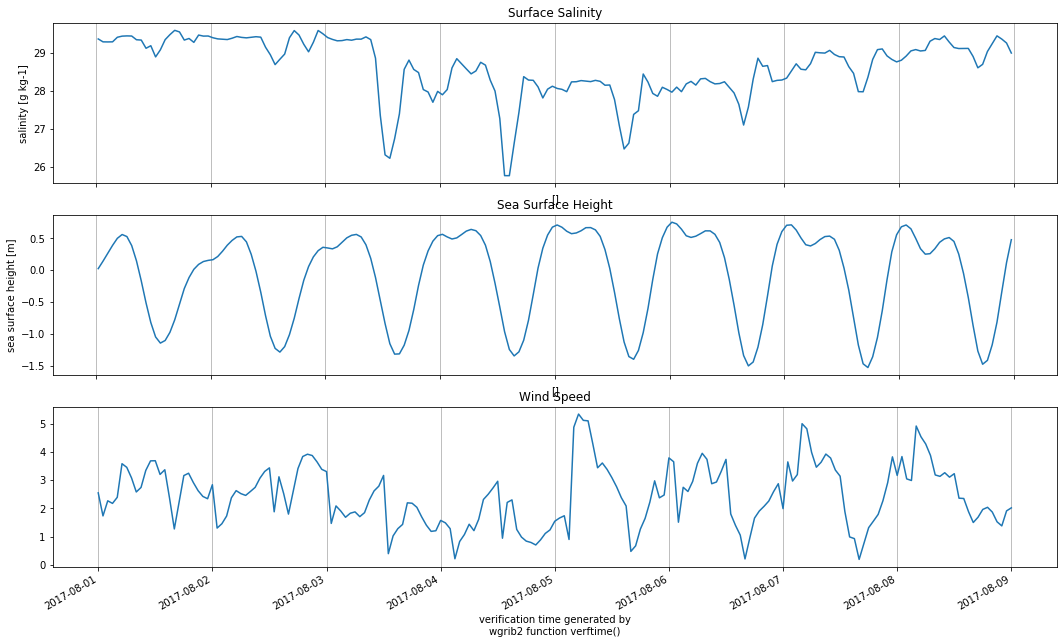

In [8]:
make_stats(slice('2017-08-01 00:00:00', '2017-08-09 00:00:00'), 'salmon', graph = True)